In [3]:
import numpy as np
import pandas as pd
from numpy import genfromtxt

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## Dataset 3

In [4]:
data3 = pd.read_csv('datasets/insurance_data.csv')
data3 = np.asarray(data3)

cols = ['FT1', 'FT2', 'FT3', 'FT4', 'FT5', 'FT6', 'Charges']
input_cols = ['FT1', 'FT2', 'FT3', 'FT4', 'FT5', 'FT6']

charges_idx = cols.index('Charges')

y_ = data3[:, charges_idx]

data3_copy = np.copy(data3)
data3_copy = np.delete(data3_copy, charges_idx, 1)

X_ = data3_copy

### Visualize the Data

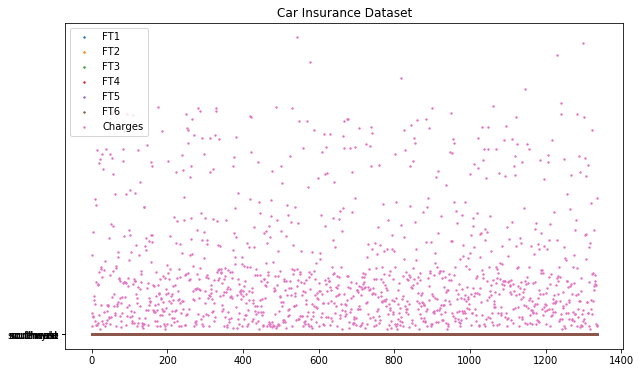

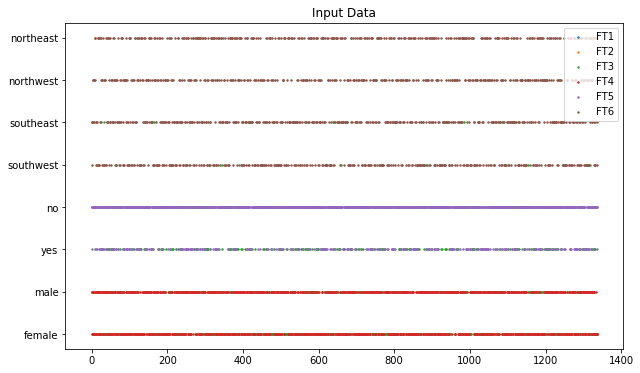

In [5]:
for idx, col in enumerate(cols):
    feature = data3[:, idx]
    plt.scatter(np.arange(len(feature)), feature, label=col,  s=2)
    
plt.title('Car Insurance Dataset')
plt.legend()
plt.show()

for idx, col in enumerate(input_cols):
    feature = X_[:, idx]
    plt.scatter(np.arange(len(feature)), feature, label=col,  s=2)
    
plt.title('Input Data')
plt.legend()
plt.show()

## Feature Preprocessing

### One-hot Encoding on Features ft4, ft5, and ft6

In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

onehot_enc = OneHotEncoder()
data3_to_onehot_enc = data3[:, 3:6] 
data3_onehot_encoded = onehot_enc.fit_transform(data3_to_onehot_enc).toarray()

X_onehot_encoded = np.copy(X_)
X_onehot_encoded = np.delete(X_onehot_encoded, np.s_[3:6], axis=1)

X_onehot_encoded = np.concatenate((X_onehot_encoded, data3_onehot_encoded), axis=1)

### Linear Regression, One-hot Encoding

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def rmse(y_1, y_2):
    return np.sqrt(mean_squared_error(y_1, y_2))

In [8]:
model = LinearRegression()

X = X_onehot_encoded
y = y_

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
#     print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
#     print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

--
RMSE Training average = 6039.342370581926
RMSE Testing average  = 6063.643882478562
RMSE overall = 6041.6796511744515


### Plot fitted values

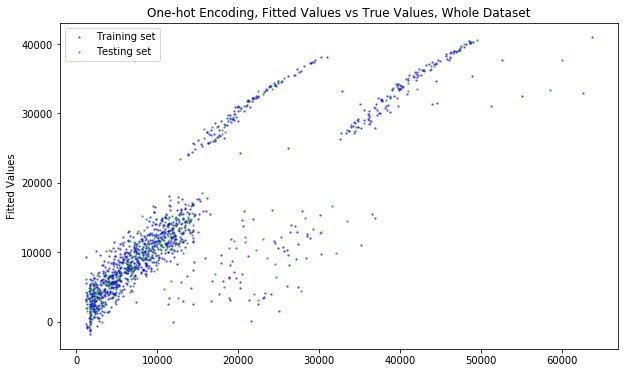

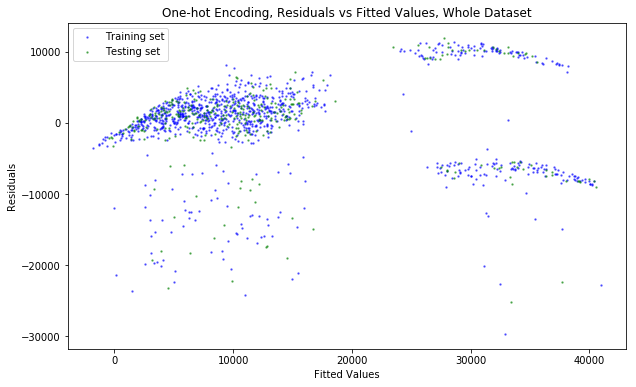

In [9]:
X = X_onehot_encoded
y = y_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
plt.show()

### Standardization on numerical features (ft 1, ft2, ft3)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data3_to_scale = data3[:, 0:3]
data3_standardized = scaler.fit_transform(data3_to_scale)

X_scaled_onehot_encoded = np.copy(X_onehot_encoded)
X_scaled_onehot_encoded = np.delete(X_scaled_onehot_encoded, np.s_[0:3], axis=1)
X_scaled_onehot_encoded = np.concatenate((data3_standardized, X_scaled_onehot_encoded), axis=1)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Linear Regression, Standardization

In [11]:
model = LinearRegression()

X = X_scaled_onehot_encoded
y = y_

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
#     print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
#     print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

--
RMSE Training average = 6042.99042433683
RMSE Testing average  = 6063.528172186527
RMSE overall = 6041.6796511744515


### Plot fitted values


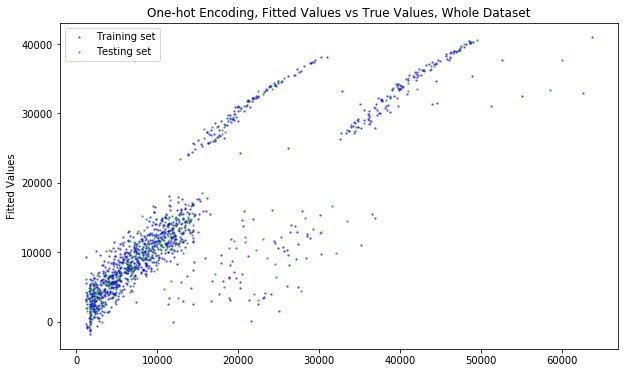

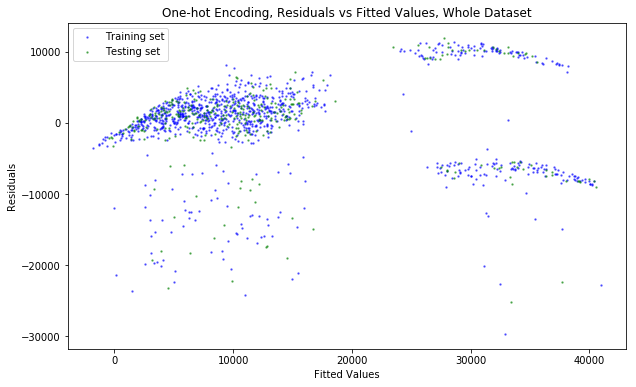

In [12]:
X = X_scaled_onehot_encoded
y = y_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
plt.show()

### Feature Division

In [13]:
data3 = pd.read_csv('datasets/insurance_data.csv')
data3 = np.asarray(data3)

data3_division = data3[:,0]

for i in range(len(data3_division)):
    if data3[i,0] < 30:
        data3_division[i] = 1
    elif data3[i,0] > 50:
        data3_division[i] = 3
    else:
        data3_division[i] = 2

data3_division = data3_division[:, np.newaxis]      

X_division_scaled_onehot_encoded = np.copy(X_scaled_onehot_encoded)
X_division_scaled_onehot_encoded = np.delete(X_division_scaled_onehot_encoded, 0, axis=1)
X_division_scaled_onehot_encoded = np.concatenate((data3_division, X_division_scaled_onehot_encoded), axis=1)

data3 = pd.read_csv('datasets/insurance_data.csv')
data3 = np.asarray(data3)

### Linear Regression, Feature Division

In [14]:
model = LinearRegression()

X = X_division_scaled_onehot_encoded
y = y_

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
#     print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
#     print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

--
RMSE Training average = 6197.956762590376
RMSE Testing average  = 6221.294563015067
RMSE overall = 6202.268511966661


### Plot fitted values

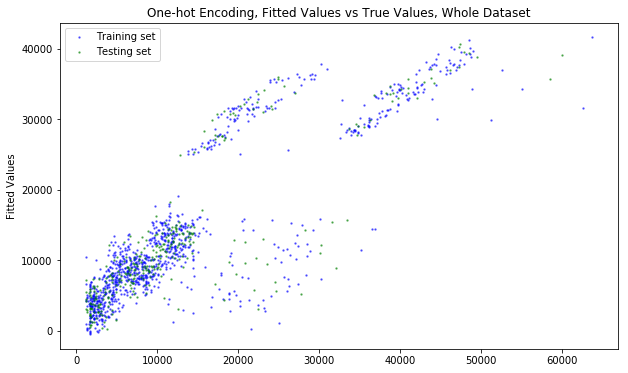

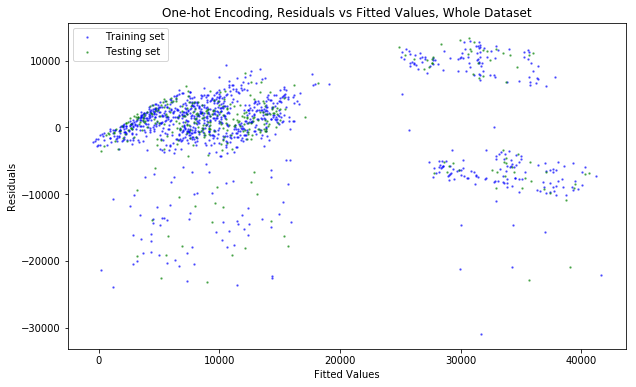

In [15]:
X = X_division_scaled_onehot_encoded
y = y_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
plt.show()

### Question 2: Correlation Exploration

#### Convert each categorical feature (ft4, ft5, ft6) to a one dimensional numerical value

In [16]:
ft4_one_dim = np.zeros(len(X_))[:, np.newaxis]
ft5_one_dim = np.zeros(len(X_))[:, np.newaxis]
ft6_one_dim = np.zeros(len(X_))[:, np.newaxis]

fts_one_dim = X_[:, 0:3]

for i in range(len(X_)):
    if X_[i,3] == 'female':
        ft4_one_dim[i] = 0
    if X_[i,3] == 'male':
        ft4_one_dim[i] = 1
    if X_[i,4] == 'no':
        ft5_one_dim[i] = 0
    if X_[i,4] == 'yes':
        ft5_one_dim[i] = 1
    if X_[i,5] == 'northeast':
        ft6_one_dim[i] = 0
    if X_[i,5] == 'northwest':
        ft6_one_dim[i] = 1
    if X_[i,5] == 'southeast':
        ft6_one_dim[i] = 2
    if X_[i,5] == 'southwest':
        ft6_one_dim[i] = 3

fts_one_dim = np.concatenate((fts_one_dim, ft4_one_dim), axis=1)        
fts_one_dim = np.concatenate((fts_one_dim, ft5_one_dim), axis=1)        
fts_one_dim = np.concatenate((fts_one_dim, ft6_one_dim), axis=1)

#### Use f_regression and mutual information regression to select two most important variables

In [17]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
import heapq

y_tests = y_.astype(float)
fts_one_dim.astype(float)

f_regression_scores = f_regression(fts_one_dim, y_tests)
mutual_info_scores = mutual_info_regression(fts_one_dim, y_tests)

print('F Regression Scores: {}'.format(np.round(f_regression_scores[0], 1)))
two_largest_freg_scores = heapq.nlargest(2, f_regression_scores[0])
print('Two Largest F Regression Scores: {}'.format(np.round(heapq.nlargest(2, f_regression_scores[0]), 4)))
print('Mutual Information Scores: {}'.format(np.round(mutual_info_scores, 4)))
two_largest_mi_scores = heapq.nlargest(2, mutual_info_scores)
print('Two Largest Mutual Information Scores: {}'.format(np.round(heapq.nlargest(2, mutual_info_scores), 4)))

F Regression Scores: [1.3120e+02 5.4700e+01 6.2000e+00 4.4000e+00 2.1776e+03 1.0000e-01]
Two Largest F Regression Scores: [2177.6149  131.174 ]
Mutual Information Scores: [1.5004 0.0735 0.161  0.1767 0.3692 0.077 ]
Two Largest Mutual Information Scores: [1.5004 0.3692]


#### Scatter plot charges vs ft2, color points based on ft5

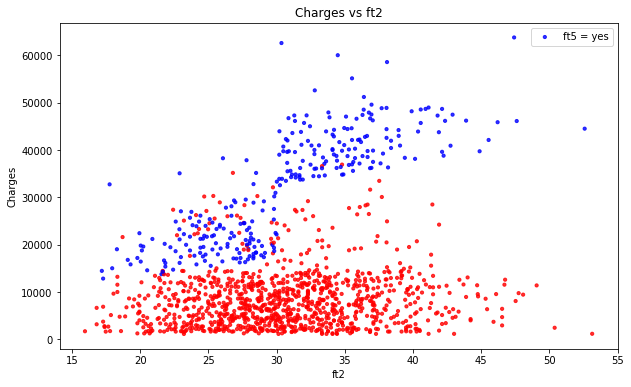

In [18]:
ft5_color = np.empty((len(X_)), dtype = str)
for i in range((len(X_))):
    if ft5_one_dim[i] == 0:
        ft5_color[i] = "r"
    if ft5_one_dim[i] == 1:
        ft5_color[i] = "b"
    
plt.scatter(X_[:,1], y_, c=ft5_color, s=10, alpha=0.8)
plt.title('Charges vs ft2')
plt.xlabel('ft2')
plt.ylabel('Charges')
plt.legend(['ft5 = yes', 'ft5 = no'])
plt.show()

#### Scatter plot charges vs ft1, color points based on ft5

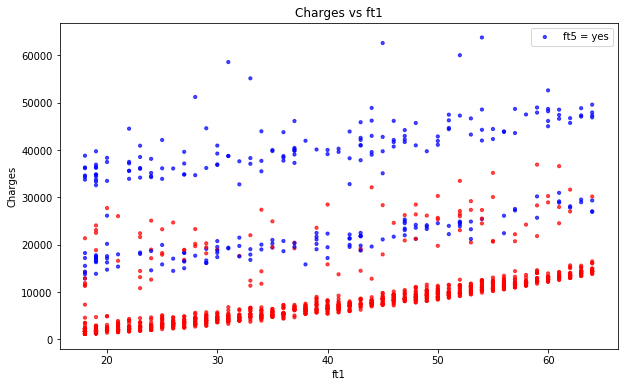

In [19]:
ft5_color = np.empty((len(X_)), dtype = str)
for i in range((len(X_))):
    if ft5_one_dim[i] == 0:
        ft5_color[i] = "r"
    if ft5_one_dim[i] == 1:
        ft5_color[i] = "b"
    
plt.scatter(X_[:,0], y_, c=ft5_color, s=10, alpha=0.7)
plt.title('Charges vs ft1')
plt.xlabel('ft1')
plt.ylabel('Charges')
plt.legend(['ft5 = yes', 'ft5 = no'])
plt.show()

### Question 3: Modify the Target Variable

#### Fitting Log($y$)

In [20]:
import math

y_log = np.asarray([math.log(num) for num in y_]) # fit to log(y)

In [21]:
# Use one-hot encoding preprocessing

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

onehot_enc = OneHotEncoder()
data3_to_onehot_enc = data3[:, 3:6]
data3_onehot_encoded = onehot_enc.fit_transform(data3_to_onehot_enc).toarray()

X_onehot_encoded = np.copy(X_)
X_onehot_encoded = np.delete(X_onehot_encoded, np.s_[3:6], axis=1)

X_onehot_encoded = np.concatenate((X_onehot_encoded, data3_onehot_encoded), axis=1)

# TODO: Calc difference between exp(log(y)) and y

In [22]:
# Train linear regression model on the log(y) data
# Calc difference between exp(log(y)) and y

model = LinearRegression()

X = X_division_scaled_onehot_encoded
y = y_log
ytrue = y_
yexplog = np.exp(y_log) 

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
#     print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
#     print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

--
RMSE Training average = 0.47777043478850983
RMSE Testing average  = 0.477526877254378
RMSE overall = 0.47798471325974307


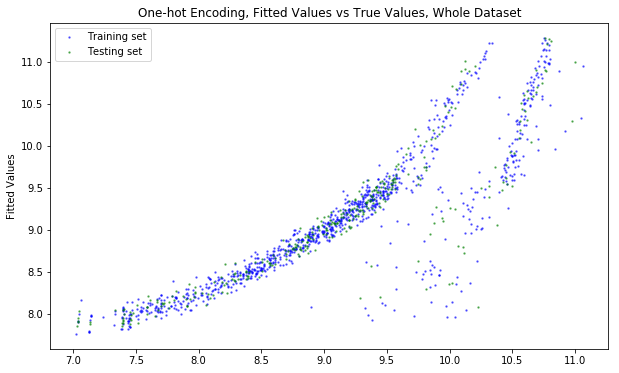

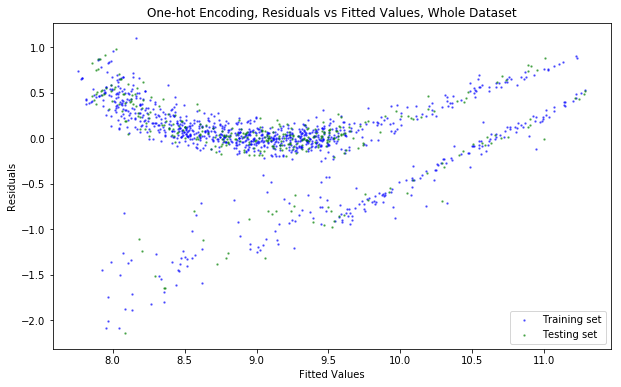

In [23]:
# Plot the results

X = X_onehot_encoded
y = y_log

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
plt.show()

#### Use f_regression and mutual information regression to select two most important variables

In [24]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
import heapq

y_tests = y_log.astype(float)
fts_one_dim.astype(float)

f_regression_scores = f_regression(fts_one_dim, y_tests)
mutual_info_scores = mutual_info_regression(fts_one_dim, y_tests)

print('F Regression Scores: {}'.format(np.round(f_regression_scores[0], 1)))
two_largest_freg_scores = heapq.nlargest(2, f_regression_scores[0])
print('Two Largest F Regression Scores: {}'.format(np.round(heapq.nlargest(2, f_regression_scores[0]), 4)))
print('Mutual Information Scores: {}'.format(np.round(mutual_info_scores, 4)))
two_largest_mi_scores = heapq.nlargest(2, mutual_info_scores)
print('Two Largest Mutual Information Scores: {}'.format(np.round(heapq.nlargest(2, mutual_info_scores), 4)))

F Regression Scores: [ 516.    23.9   35.7    0.  1062.1    2.4]
Two Largest F Regression Scores: [1062.1239  515.9771]
Mutual Information Scores: [1.498  0.0694 0.161  0.1763 0.3694 0.0775]
Two Largest Mutual Information Scores: [1.498  0.3694]


#### Scatter plot charges vs ft2, color points based on ft5

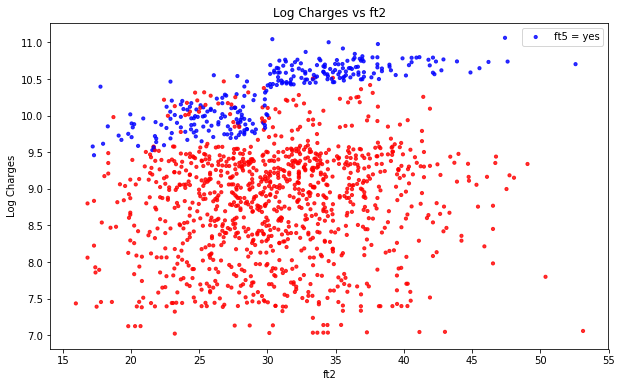

In [25]:
ft5_color = np.empty((len(X_)), dtype = str)
for i in range((len(X_))):
    if ft5_one_dim[i] == 0:
        ft5_color[i] = "r"
    if ft5_one_dim[i] == 1:
        ft5_color[i] = "b"
    
plt.scatter(X_[:,1], y_log, c=ft5_color, s=10, alpha=0.8)
plt.title('Log Charges vs ft2')
plt.xlabel('ft2')
plt.ylabel('Log Charges')
plt.legend(['ft5 = yes', 'ft5 = no'])
plt.show()

#### Scatter plot charges vs ft1, color points based on ft5


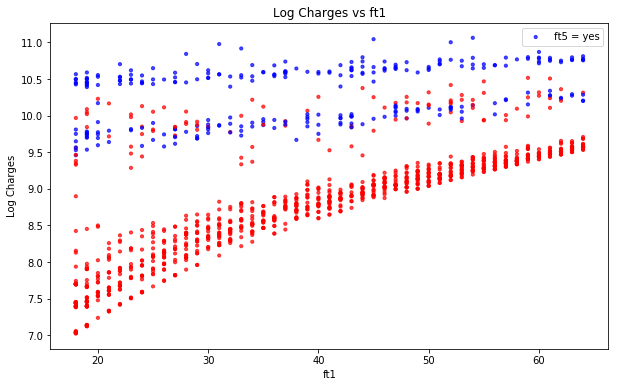

In [26]:
ft5_color = np.empty((len(X_)), dtype = str)
for i in range((len(X_))):
    if ft5_one_dim[i] == 0:
        ft5_color[i] = "r"
    if ft5_one_dim[i] == 1:
        ft5_color[i] = "b"
    
plt.scatter(X_[:,0], y_log, c=ft5_color, s=10, alpha=0.7)
plt.title('Log Charges vs ft1')
plt.xlabel('ft1')
plt.ylabel('Log Charges')
plt.legend(['ft5 = yes', 'ft5 = no'])
plt.show()

## Bonus Questions

In [27]:
import os
os.system("say 'I am done with this program. Let's go team!") 

0